In [ ]:
senha =int(input('digite sua senha '))

if senha == 1234:
  print('acesso permitido')
else:
  print('acesso negado')



In [ ]:
n = int(input('digite um numero:'))
for c in range (1,11):
  print('{} x {} = {}'.format(n, c, n*c))

In [ ]:
senha= int(input('digite a senha do seu banco:\n'))

while senha != 1234:
      senha= int (input('tente novamente: '))

print('Acesso liberado')

In [ ]:
from array import array
import numpy as np

#criando um array ID a partir de uma lista (criando um array de um numero só )

arr= np.array(list(map(int,input( "digite um numero").split())))
print(arr)

In [ ]:
from array import array
import numpy as np

arr1 = np.array([1, 2 , 3 ,4])
arr2 = np.array([2, 3, 4 ,5 ])

print ("Soma:", arr1+arr2 )
print("Media:", (arr1+arr2)/ 2)
print("Raiz quadrada:",np .sqrt (arr1+arr2))

In [ ]:
import pandas as pd

#desafio de pandas

data= {'nome' :['Samuel'],
      'idade':[18],
      'local' :['rio']
}

df = pd.DataFrame(data)
print(df)

df.info()
df.shape
df.describe()

idades= df['idade']
print("Coluna'idade':",idades.head())

df['AnoNascimento'] =2025 - df['idade']
print("\'AnoNascimento':\n",df.head())




In [ ]:
#criando gráfico

import matplotlib.pyplot as plt


x = [1,2,3,4]
y = [10,20,25,30]


plt.plot(x,y, label='Tendência de Vendas')
plt.xlabel('Mês')
plt.ylabel('vendas (em K)')
plt.title('cresimento mensal ')
plt.legend('teste')
plt.show('teste')

   Graus     Dias
0     35  Domingo
1     20  Segunda
2     30    Terca
3     28   Quarta
4     26   Quinta
5     25    Sexta
6     35   Sabado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Graus   7 non-null      int64 
 1   Dias    7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes

Média: 28.43°C


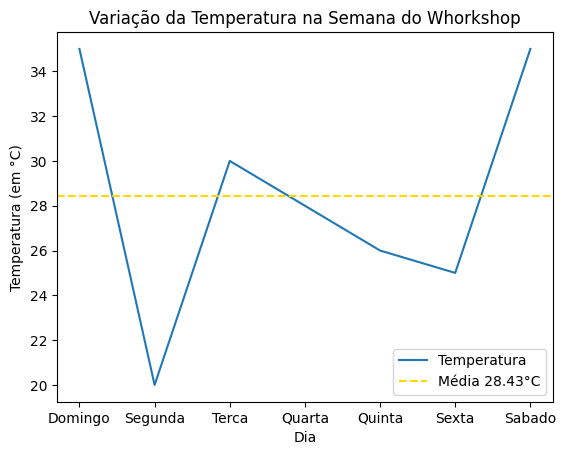

In [ ]:
# DESAFIO FINAL 08/09/2025

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dias=np.array(['Domingo','Segunda','Terca','Quarta','Quinta','Sexta','Sabado'])
temperatura=np.array([35,20,30,28,26,25,35])

data={
"Graus":temperatura,
"Dias":dias
}
df= pd.DataFrame(data)
print(df)

df.info()
df.shape
df.describe()

media= float(np.mean(temperatura))
print("\nMédia: {:.2f}°C".format(media))

plt.plot(dias,temperatura, label='Temperatura')
plt.axhline(media, color='gold', linestyle='--', label=f'Média {media:.2f}°C')
plt.ylabel('Temperatura (em °C)')
plt.xlabel('Dia')
plt.title('Variação da Temperatura na Semana do Whorkshop')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar o dataset
df = pd.read_csv("churn_data.csv")

# 2. Validar se a coluna 'Churn' existe
if "Churn" not in df.columns:
    raise ValueError("A coluna 'Churn' não foi encontrada no dataset.")

# 3. Calcular métricas
total_clientes = len(df)
cancelaram = df[df["Churn"] == "Yes"].shape[0]
nao_cancelaram = df[df["Churn"] == "No"].shape[0]

# 4. Calcular taxa de churn
taxa_churn = (cancelaram / total_clientes) * 100

# 5. Exibir resultado no console
print(f"Taxa de Churn: {taxa_churn:.2f}%")
print(f"Clientes que cancelaram: {cancelaram}")
print(f"Clientes que permaneceram: {nao_cancelaram}")
print(f"Total de clientes: {total_clientes}")

# 6. Gráfico de pizza (distribuição Yes / No)
plt.figure(figsize=(6,6))
plt.pie(
    [cancelaram, nao_cancelaram],
    labels=["Cancelaram (Yes)", "Não Cancelaram (No)"],
    autopct="%1.2f%%",
    startangle=90,
    colors=["#FF6B6B", "#4ECDC4"]
)
plt.title("Distribuição de Cancelamentos (Churn)")
plt.show()

# 7. Gráfico de barras (comparação absoluta)
plt.figure(figsize=(6,4))
plt.bar(["Cancelaram", "Não Cancelaram"], [cancelaram, nao_cancelaram], color=["#FF6B6B", "#4ECDC4"])
plt.title("Quantidade de Clientes por Status de Churn")
plt.ylabel("Número de Clientes")
plt.show()


📂 Faça o upload do arquivo 'churn_data.csv'


Saving churn_data.csv to churn_data (1).csv
✅ Arquivo lido com sucesso usando {'sep': ',', 'encoding': 'utf-8'}

📊 RESULTADO DA ANÁLISE DE CHURN
Taxa de Churn: 36.00%
Clientes que cancelaram: 18
Clientes que permaneceram: 32
Total de clientes: 50


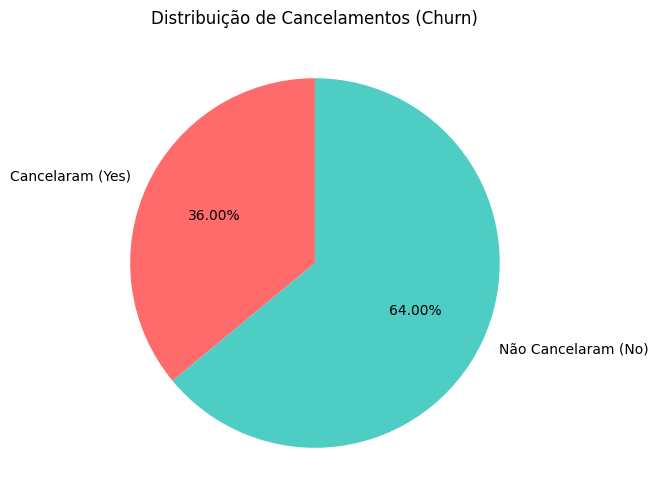

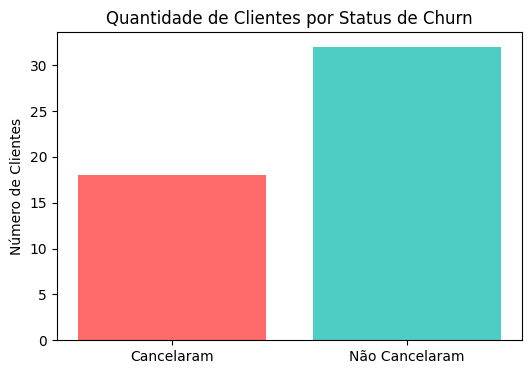

In [ ]:
# ============================
# ANÁLISE DE CHURN COMPLETA
# ============================

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ----------------------------
# 1. Upload do arquivo
# ----------------------------
print("📂 Faça o upload do arquivo 'churn_data.csv'")
uploaded = files.upload()

# Pega o nome do arquivo enviado
csv_name = list(uploaded.keys())[0]

# ----------------------------
# 2. Tenta carregar o dataset
# ----------------------------
df = None
tentativas = [
    {"sep": ",", "encoding": "utf-8"},
    {"sep": ";", "encoding": "utf-8"},
    {"sep": ",", "encoding": "latin-1"},
    {"sep": ";", "encoding": "latin-1"},
]

for t in tentativas:
    try:
        df = pd.read_csv(csv_name, **t)
        print(f"✅ Arquivo lido com sucesso usando {t}")
        break
    except Exception as e:
        print(f"Tentativa falhou: {t} -> {e}")

if df is None:
    raise ValueError("❌ Não foi possível carregar o arquivo CSV. Verifique o separador e encoding.")

# ----------------------------
# 3. Validar coluna 'Churn'
# ----------------------------
if "Churn" not in df.columns:
    possiveis = [c for c in df.columns if c.lower() == "churn"]
    if possiveis:
        df = df.rename(columns={possiveis[0]: "Churn"})
        print(f"⚠️ Coluna renomeada de {possiveis[0]} para 'Churn'")
    else:
        raise ValueError(f"❌ A coluna 'Churn' não foi encontrada. Colunas disponíveis: {list(df.columns)}")

# ----------------------------
# 4. Cálculos principais
# ----------------------------
total_clientes = len(df)
cancelaram = (df["Churn"] == "Yes").sum()
nao_cancelaram = (df["Churn"] == "No").sum()
taxa_churn = (cancelaram / total_clientes) * 100

# ----------------------------
# 5. Resultado no console
# ----------------------------
print("\n📊 RESULTADO DA ANÁLISE DE CHURN")
print(f"Taxa de Churn: {taxa_churn:.2f}%")
print(f"Clientes que cancelaram: {cancelaram}")
print(f"Clientes que permaneceram: {nao_cancelaram}")
print(f"Total de clientes: {total_clientes}")

# ----------------------------
# 6. Gráfico de pizza
# ----------------------------
plt.figure(figsize=(6,6))
plt.pie(
    [cancelaram, nao_cancelaram],
    labels=["Cancelaram (Yes)", "Não Cancelaram (No)"],
    autopct="%1.2f%%",
    startangle=90,
    colors=["#FF6B6B", "#4ECDC4"]
)
plt.title("Distribuição de Cancelamentos (Churn)")
plt.show()

# ----------------------------
# 7. Gráfico de barras
# ----------------------------
plt.figure(figsize=(6,4))
plt.bar(
    ["Cancelaram", "Não Cancelaram"],
    [cancelaram, nao_cancelaram],
    color=["#FF6B6B", "#4ECDC4"]
)
plt.title("Quantidade de Clientes por Status de Churn")
plt.ylabel("Número de Clientes")
plt.show()


In [75]:
import pandas as pd

df= pd.read_csv('dados_nao_tratados.csv')
display(df)


,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,Sim
1,2,Bruno,vinte e três,2023/13/01,9.0,TRUE
2,3,Carla,30,NaN,NaN,Não
3,4,Daniel,NaN,2022-07-15,7.2,sim
4,5,Érica,27,2022-08-XX,8,e
5,6,Francisco,29,15/09/2022,dez,FALSE
6,7,Gabriela,21,2023-01-05,10,TRUE
7,8,Henrique,19,2023-02-30,9.5,nao
8,9,Ivana,11,2023-03-10,NaN,Yes
9,10,José,?,2022-11-25,6.7,sim


In [76]:
df["ativo"] = df["ativo"].str.strip().str.lower().map({"sim":True,"yes":True,"true":True,"false":False,"nao":False,"não":False})
df.dropna(subset=["data_inscricao"], inplace=True)
display(df)

,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,True
1,2,Bruno,vinte e três,2023/13/01,9.0,True
3,4,Daniel,NaN,2022-07-15,7.2,True
4,5,Érica,27,2022-08-XX,8,NaN
5,6,Francisco,29,15/09/2022,dez,False
6,7,Gabriela,21,2023-01-05,10,True
7,8,Henrique,19,2023-02-30,9.5,False
8,9,Ivana,11,2023-03-10,NaN,True
9,10,José,?,2022-11-25,6.7,True


In [77]:
df["idade"] = pd.to_numeric(df["idade"],errors="coerce")
df["idade"] = df["idade"].astype('Int64')

display(df)


,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,True
1,2,Bruno,<NA>,2023/13/01,9.0,True
3,4,Daniel,<NA>,2022-07-15,7.2,True
4,5,Érica,27,2022-08-XX,8,NaN
5,6,Francisco,29,15/09/2022,dez,False
6,7,Gabriela,21,2023-01-05,10,True
7,8,Henrique,19,2023-02-30,9.5,False
8,9,Ivana,11,2023-03-10,NaN,True
9,10,José,<NA>,2022-11-25,6.7,True


In [78]:
df["nota"] = pd.to_numeric(df["nota"],errors="coerce")
df["nota"] = df["nota"].astype('float')

display(df)

,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,True
1,2,Bruno,<NA>,2023/13/01,9.0,True
3,4,Daniel,<NA>,2022-07-15,7.2,True
4,5,Érica,27,2022-08-XX,8.0,NaN
5,6,Francisco,29,15/09/2022,NaN,False
6,7,Gabriela,21,2023-01-05,10.0,True
7,8,Henrique,19,2023-02-30,9.5,False
8,9,Ivana,11,2023-03-10,NaN,True
9,10,José,<NA>,2022-11-25,6.7,True


In [79]:
df["data_inscricao"]= pd.to_datetime(df["data_inscricao"], errors="coerce")
display(df)


,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,True
1,2,Bruno,<NA>,NaT,9.0,True
3,4,Daniel,<NA>,2022-07-15,7.2,True
4,5,Érica,27,NaT,8.0,NaN
5,6,Francisco,29,NaT,NaN,False
6,7,Gabriela,21,2023-01-05,10.0,True
7,8,Henrique,19,NaT,9.5,False
8,9,Ivana,11,2023-03-10,NaN,True
9,10,José,<NA>,2022-11-25,6.7,True


In [80]:
df['ativo'] = df['ativo'].fillna("Sem Dados")

display(df)

,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12,8.5,True
1,2,Bruno,<NA>,NaT,9.0,True
3,4,Daniel,<NA>,2022-07-15,7.2,True
4,5,Érica,27,NaT,8.0,Sem Dados
5,6,Francisco,29,NaT,NaN,False
6,7,Gabriela,21,2023-01-05,10.0,True
7,8,Henrique,19,NaT,9.5,False
8,9,Ivana,11,2023-03-10,NaN,True
9,10,José,<NA>,2022-11-25,6.7,True


In [81]:
df = df.fillna(0)

display(df)

,id,nome,idade,data_inscricao,nota,ativo
0,1,Ana,25,2023-05-12 00:00:00,8.5,True
1,2,Bruno,0,0,9.0,True
3,4,Daniel,0,2022-07-15 00:00:00,7.2,True
4,5,Érica,27,0,8.0,Sem Dados
5,6,Francisco,29,0,0.0,False
6,7,Gabriela,21,2023-01-05 00:00:00,10.0,True
7,8,Henrique,19,0,9.5,False
8,9,Ivana,11,2023-03-10 00:00:00,0.0,True
9,10,José,0,2022-11-25 00:00:00,6.7,True
